In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.tsa.stattools as sts
import statsmodels.graphics.tsaplots as sgt
from statsmodels.tsa.seasonal import seasonal_decompose
import scipy.stats
import pylab

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
weather_data = pd.read_csv('/content/drive/MyDrive/Capstone_ML_Guild/Capstone/Time_Series_Analysis_for_Weather/Weather_TimeSeries.csv')

In [3]:
df_city = weather_data.loc[weather_data['State'] == 'MADHYA PRADESH'][weather_data['District'] == 'GWALIOR'].copy()
df_city = df_city.sort_values(by=['Year', 'Month'])

df_temp_min = pd.DataFrame(columns=['Date', 'Temp_Min'])
df_temp_min['Date'] = pd.to_datetime(df_city['Year'].astype(str) + '-' + df_city['Month'].astype(str) + '-1')
df_temp_min['Temp_Min'] = df_city['Temp_Min'].copy()
df_temp_min.set_index('Date', inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


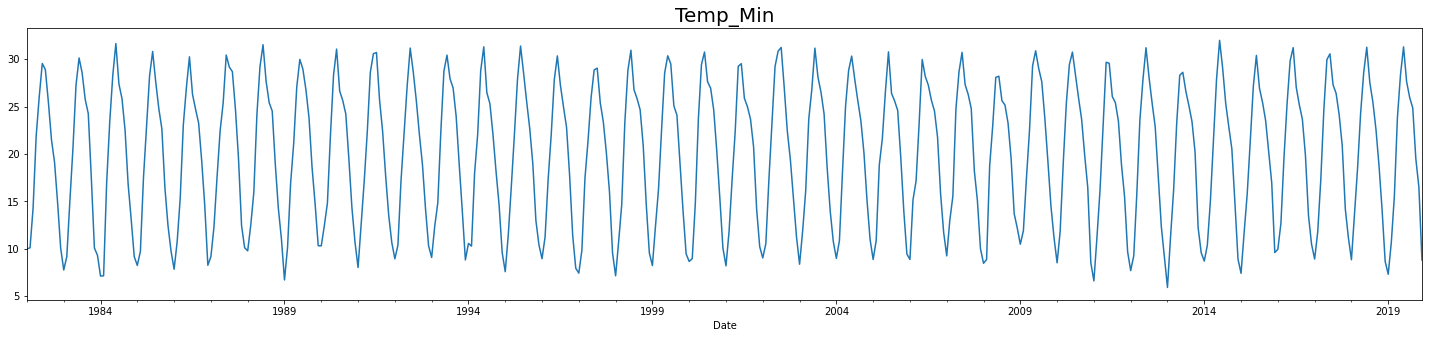

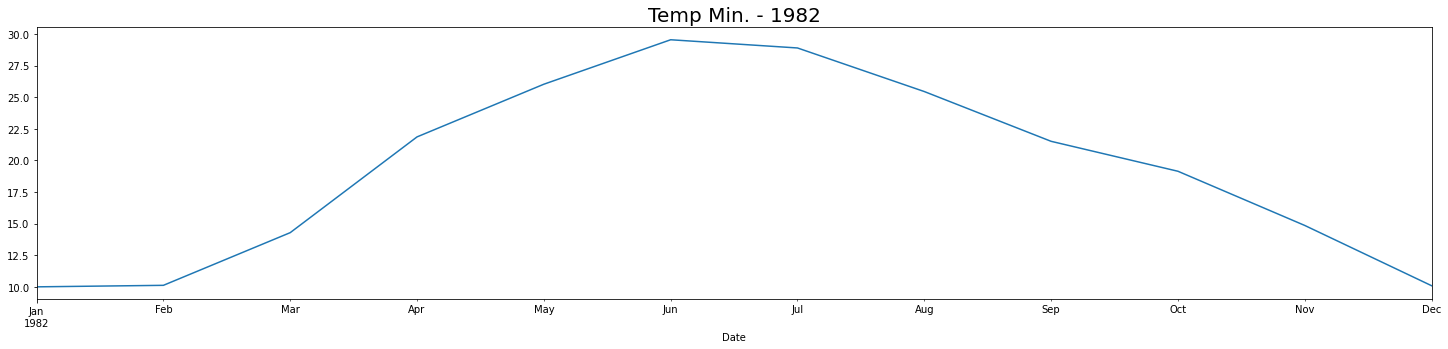

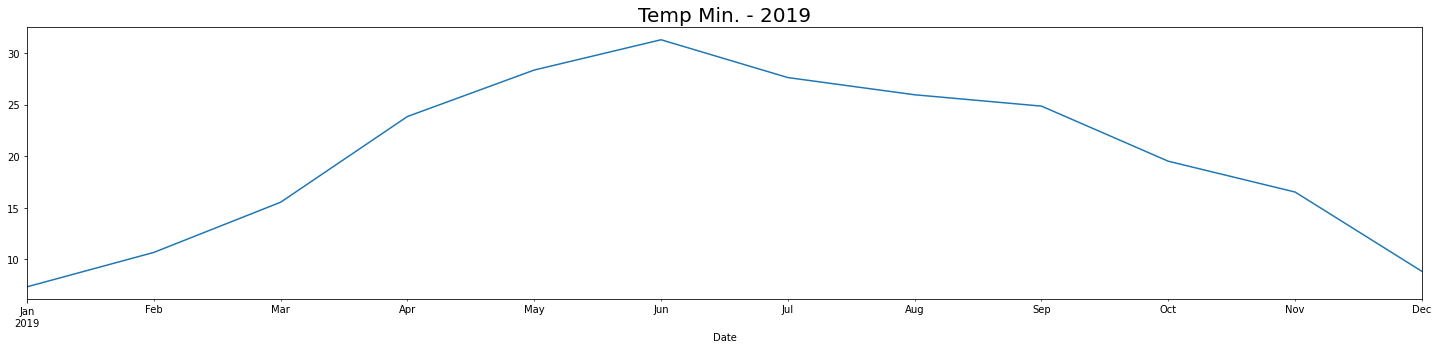

In [4]:
df_temp_min['Temp_Min'].plot(figsize=(25,5))
plt.title('Temp_Min', size=20)
plt.show()

df_temp_min['Temp_Min'].loc['1982'].plot(figsize=(25,5))
plt.title('Temp Min. - 1982', size=20)
plt.show()

df_temp_min['Temp_Min'].loc['2019'].plot(figsize=(25,5))
plt.title('Temp Min. - 2019', size=20)
plt.show()

In [5]:
# Train/Test split
df_test = df_temp_min.iloc[-56:] # Test data
df = df_temp_min.iloc[:-56]

## Stationarity

In [6]:
sts.adfuller(df.Temp_Min)

(-2.9644832319480057,
 0.03834698902983978,
 12,
 387,
 {'1%': -3.447360865754795,
  '10%': -2.5707639493486636,
  '5%': -2.8690374364690445},
 1298.2994948735227)

Test suggests that the TS has stationarity with 95% confidence.

## Seasonality

<Figure size 2160x720 with 0 Axes>

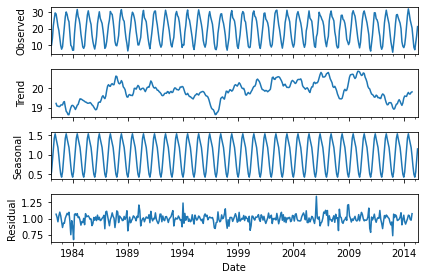

In [7]:
## Seasonality
plt.figure(figsize=(30,10))
s_dec_multiplicative = seasonal_decompose(df.Temp_Min, model = "multiplicative")
s_dec_multiplicative.plot()
plt.show()

## ACF

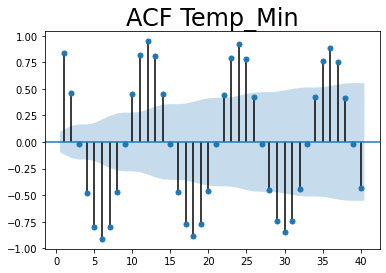

In [8]:
sgt.plot_acf(df.Temp_Min, lags = 40, zero = False)
plt.title("ACF Temp_Min", size = 24)
plt.show()

## PACF

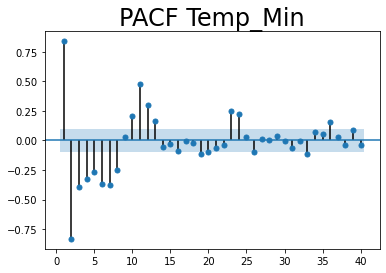

In [9]:
sgt.plot_pacf(df.Temp_Min, lags = 40, zero = False, method = ('ols'))
plt.title("PACF Temp_Min", size = 24)
plt.show()

## Try out Models

In [10]:
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2

In [11]:
def LLR_test(mod_1, mod_2, DF=1):
  # L1 = mod_1.fit().llf
  # L2 = mod_2.fit().llf
  # LR = (2*(L2-L1))
  # p = chi2.sf(LR, DF).round(3)
  p = chi2.sf(mod_2.llf - mod_1.llf, DF).round(3)
  return p

### Simple AR Model

In [12]:
model_ar_1 = ARMA(df.Temp_Min, order=(1,0))
results_ar_1 = model_ar_1.fit()
print(results_ar_1.summary())

                              ARMA Model Results                              
Dep. Variable:               Temp_Min   No. Observations:                  400
Model:                     ARMA(1, 0)   Log Likelihood               -1126.500
Method:                       css-mle   S.D. of innovations              4.038
Date:                Tue, 01 Dec 2020   AIC                           2259.000
Time:                        03:28:22   BIC                           2270.975
Sample:                    01-01-1982   HQIC                          2263.742
                         - 04-01-2015                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             19.6537      1.251     15.709      0.000      17.202      22.106
ar.L1.Temp_Min     0.8407      0.027     31.227      0.000       0.788       0.893
                                    

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [13]:
model_ar_2 = ARMA(df.Temp_Min, order=(2,0))
results_ar_2 = model_ar_2.fit()
print(results_ar_2.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:               Temp_Min   No. Observations:                  400
Model:                     ARMA(2, 0)   Log Likelihood                -890.835
Method:                       css-mle   S.D. of innovations              2.234
Date:                Tue, 01 Dec 2020   AIC                           1789.670
Time:                        03:28:22   BIC                           1805.636
Sample:                    01-01-1982   HQIC                          1795.993
                         - 04-01-2015                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             19.8066      0.383     51.690      0.000      19.056      20.558
ar.L1.Temp_Min     1.5409      0.027     56.137      0.000       1.487       1.595
ar.L2.Temp_Min    -0.8327      0.027

In [14]:
model_ar_3 = ARMA(df.Temp_Min, order=(3,0))
results_ar_3 = model_ar_3.fit()
print(results_ar_3.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:               Temp_Min   No. Observations:                  400
Model:                     ARMA(3, 0)   Log Likelihood                -857.714
Method:                       css-mle   S.D. of innovations              2.055
Date:                Tue, 01 Dec 2020   AIC                           1725.428
Time:                        03:28:22   BIC                           1745.386
Sample:                    01-01-1982   HQIC                          1733.332
                         - 04-01-2015                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             19.8140      0.254     78.034      0.000      19.316      20.312
ar.L1.Temp_Min     1.2153      0.046     26.498      0.000       1.125       1.305
ar.L2.Temp_Min    -0.2300      0.075

In [15]:
model_ar_4 = ARMA(df.Temp_Min, order=(4,0))
results_ar_4 = model_ar_4.fit()
print(results_ar_4.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:               Temp_Min   No. Observations:                  400
Model:                     ARMA(4, 0)   Log Likelihood                -835.836
Method:                       css-mle   S.D. of innovations              1.944
Date:                Tue, 01 Dec 2020   AIC                           1683.672
Time:                        03:28:23   BIC                           1707.621
Sample:                    01-01-1982   HQIC                          1693.156
                         - 04-01-2015                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             19.8171      0.182    109.011      0.000      19.461      20.173
ar.L1.Temp_Min     1.0885      0.047     23.041      0.000       0.996       1.181
ar.L2.Temp_Min    -0.3027      0.072

In [16]:
LLR_test(results_ar_2, results_ar_3)

0.0

In [17]:
# Residuals
df_ar_resid = pd.DataFrame(results_ar_3.resid, columns=['Temp_Min'])

In [18]:
df_ar_resid['Temp_Min'].mean()

-0.021978884985038683

In [19]:
df_ar_resid['Temp_Min'].var()

4.460709021981471

In [20]:
sts.adfuller(df_ar_resid['Temp_Min'])

(-2.6245967735773155,
 0.08801942162893767,
 17,
 382,
 {'1%': -3.4475850438570115,
  '10%': -2.5708164748773332,
  '5%': -2.869135963767125},
 1371.9075176257081)

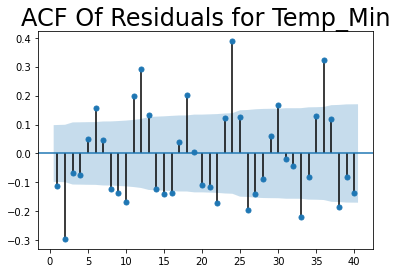

In [21]:
sgt.plot_acf(df_ar_resid['Temp_Min'], zero = False, lags = 40)
plt.title("ACF Of Residuals for Temp_Min",size=24)
plt.show()

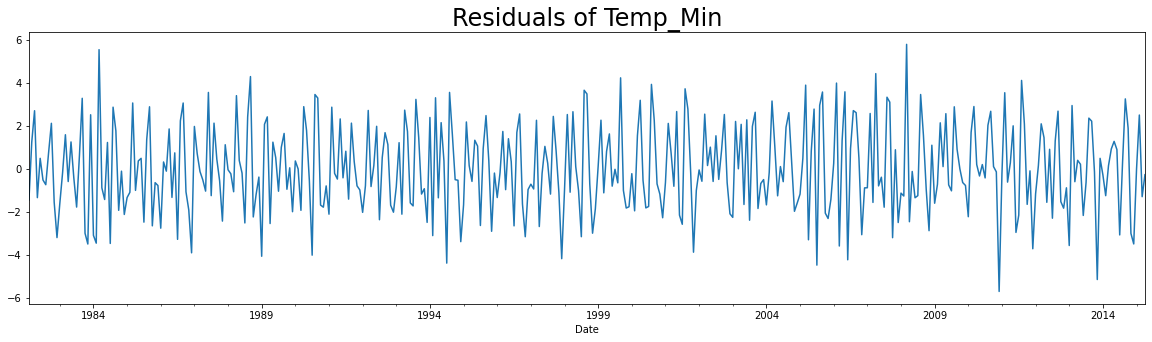

In [22]:
df_ar_resid['Temp_Min'][1:].plot(figsize=(20,5))
plt.title("Residuals of Temp_Min",size=24)
plt.show()

### MA and ARMA Model

In [23]:
model_ma_1 = ARMA(df['Temp_Min'], order=(0,1))
results_ma_1 = model_ma_1.fit()
print(results_ma_1.summary())

                              ARMA Model Results                              
Dep. Variable:               Temp_Min   No. Observations:                  400
Model:                     ARMA(0, 1)   Log Likelihood               -1160.694
Method:                       css-mle   S.D. of innovations              4.396
Date:                Tue, 01 Dec 2020   AIC                           2327.388
Time:                        03:28:23   BIC                           2339.363
Sample:                    01-01-1982   HQIC                          2332.130
                         - 04-01-2015                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             19.7556      0.418     47.312      0.000      18.937      20.574
ma.L1.Temp_Min     0.9020      0.018     49.871      0.000       0.867       0.937
                                    

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [24]:
model_arma_1_1 = ARMA(df['Temp_Min'], order=(1,1))
results_arma_1_1 = model_arma_1_1.fit()
print(results_arma_1_1.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:               Temp_Min   No. Observations:                  400
Model:                     ARMA(1, 1)   Log Likelihood               -1021.104
Method:                       css-mle   S.D. of innovations              3.099
Date:                Tue, 01 Dec 2020   AIC                           2050.207
Time:                        03:28:24   BIC                           2066.173
Sample:                    01-01-1982   HQIC                          2056.530
                         - 04-01-2015                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             19.7114      1.081     18.233      0.000      17.592      21.830
ar.L1.Temp_Min     0.7678      0.033     23.105      0.000       0.703       0.833
ma.L1.Temp_Min     0.6351      0.034

In [25]:
model_arma_1_2 = ARMA(df['Temp_Min'], order=(1,2))
results_arma_1_2 = model_arma_1_2.fit()
print(results_arma_1_2.summary())
print("\nLLR test p-value = " + str(LLR_test(results_arma_1_1, results_arma_1_2)))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:               Temp_Min   No. Observations:                  400
Model:                     ARMA(1, 2)   Log Likelihood               -1154.199
Method:                       css-mle   S.D. of innovations              4.322
Date:                Tue, 01 Dec 2020   AIC                           2318.398
Time:                        03:28:24   BIC                           2338.356
Sample:                    01-01-1982   HQIC                          2326.302
                         - 04-01-2015                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             19.8609      0.091    217.815      0.000      19.682      20.040
ar.L1.Temp_Min     0.8966      0.033     27.495      0.000       0.833       0.960
ma.L1.Temp_Min    -0.0749      0.024

In [26]:
model_arma_2_2 = ARMA(df['Temp_Min'], order=(2,2))
results_arma_2_2 = model_arma_2_2.fit()
print(results_arma_2_2.summary())
print("\nLLR test p-value = " + str(LLR_test(results_arma_1_1, results_arma_2_2, 2)))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:               Temp_Min   No. Observations:                  400
Model:                     ARMA(2, 2)   Log Likelihood                -800.884
Method:                       css-mle   S.D. of innovations              1.780
Date:                Tue, 01 Dec 2020   AIC                           1613.769
Time:                        03:28:24   BIC                           1637.717
Sample:                    01-01-1982   HQIC                          1623.253
                         - 04-01-2015                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             19.8215      0.071    278.332      0.000      19.682      19.961
ar.L1.Temp_Min     1.7081      0.011    157.475      0.000       1.687       1.729
ar.L2.Temp_Min    -0.9766      0.011

In [27]:
model_arma_2_1 = ARMA(df['Temp_Min'], order=(2,1))
results_arma_2_1 = model_arma_2_1.fit(start_ar_lags=1)
print(results_arma_2_1.summary())
print("\nLLR test p-value = " + str(LLR_test(results_arma_2_1, results_arma_2_2)))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:               Temp_Min   No. Observations:                  400
Model:                     ARMA(2, 1)   Log Likelihood                -802.181
Method:                       css-mle   S.D. of innovations              1.786
Date:                Tue, 01 Dec 2020   AIC                           1614.362
Time:                        03:28:24   BIC                           1634.320
Sample:                    01-01-1982   HQIC                          1622.266
                         - 04-01-2015                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             19.8224      0.072    274.086      0.000      19.681      19.964
ar.L1.Temp_Min     1.7020      0.012    146.755      0.000       1.679       1.725
ar.L2.Temp_Min    -0.9702      0.011

In [28]:
# model_arma_3_3 = ARMA(df['Temp_Min'], order=(3,3))
# results_arma_3_3 = model_arma_3_3.fit() # Throws error
# print(results_arma_3_3.summary())
# print("\nLLR test p-value = " + str(LLR_test(results_arma_2_1, results_arma_3_3, 3)))

In [29]:
model_arma_3_1 = ARMA(df['Temp_Min'], order=(3,1))
results_arma_3_1 = model_arma_3_1.fit(start_ar_lags=1)
print(results_arma_3_1.summary())
print("\nLLR test p-value = " + str(LLR_test(results_arma_2_1, results_arma_3_1)))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:               Temp_Min   No. Observations:                  400
Model:                     ARMA(3, 1)   Log Likelihood                -801.523
Method:                       css-mle   S.D. of innovations              1.783
Date:                Tue, 01 Dec 2020   AIC                           1615.047
Time:                        03:28:25   BIC                           1638.996
Sample:                    01-01-1982   HQIC                          1624.531
                         - 04-01-2015                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             19.8220      0.072    275.762      0.000      19.681      19.963
ar.L1.Temp_Min     1.6389      0.056     29.355      0.000       1.529       1.748
ar.L2.Temp_Min    -0.8609      0.095

In [30]:
model_arma_3_2 = ARMA(df['Temp_Min'], order=(3,2))
results_arma_3_2 = model_arma_3_2.fit()
print(results_arma_3_2.summary())
print("\nLLR test p-value = " + str(LLR_test(results_arma_2_1, results_arma_3_2, 2)))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                              ARMA Model Results                              
Dep. Variable:               Temp_Min   No. Observations:                  400
Model:                     ARMA(3, 2)   Log Likelihood                -741.354
Method:                       css-mle   S.D. of innovations              1.519
Date:                Tue, 01 Dec 2020   AIC                           1496.708
Time:                        03:28:28   BIC                           1524.648
Sample:                    01-01-1982   HQIC                          1507.772
                         - 04-01-2015                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             19.8112      0.097    204.755      0.000      19.622      20.001
ar.L1.Temp_Min     2.1613      0.002   1332.596      0.000       2.158       2.164
ar.L2.Temp_Min    -1.7432      0.001

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [31]:
df_arma_resid = pd.DataFrame(results_arma_3_2.resid, columns=['Temp_Min'])

In [32]:
df_arma_resid['Temp_Min'].mean()

-0.01581845348208524

In [33]:
df_arma_resid['Temp_Min'].var() ** (1/2)

1.6084551844935138

In [34]:
sts.adfuller(df_arma_resid['Temp_Min'])

(-4.175650073838248,
 0.0007243040595850226,
 12,
 387,
 {'1%': -3.447360865754795,
  '10%': -2.5707639493486636,
  '5%': -2.8690374364690445},
 1276.252879971461)

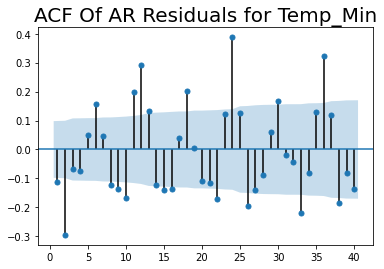

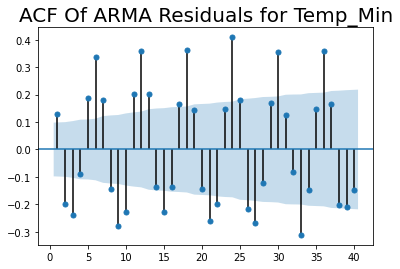

In [35]:
sgt.plot_acf(df_ar_resid['Temp_Min'], zero = False, lags = 40)
plt.title("ACF Of AR Residuals for Temp_Min",size=20)
plt.show()

sgt.plot_acf(df_arma_resid['Temp_Min'], zero = False, lags = 40)
plt.title("ACF Of ARMA Residuals for Temp_Min",size=20)
plt.show()

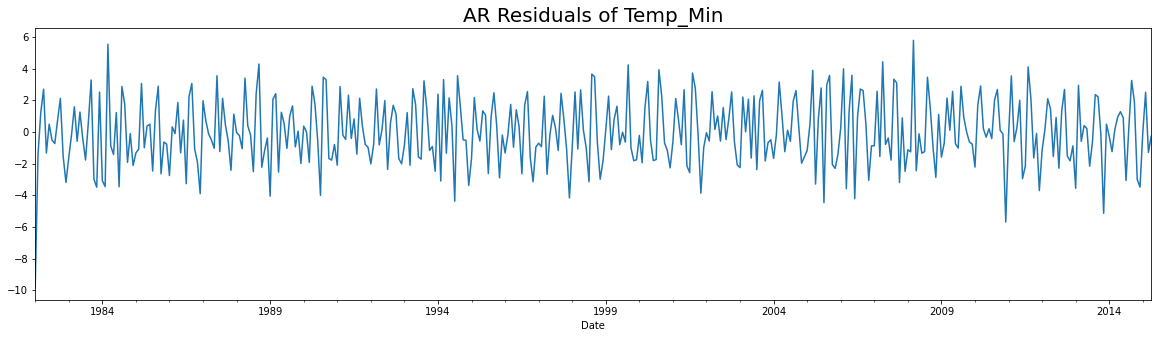

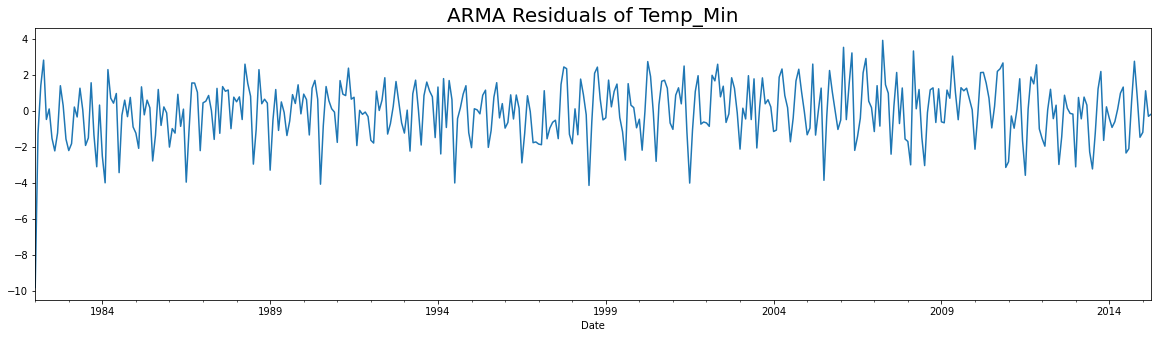

In [36]:
df_ar_resid['Temp_Min'].plot(figsize=(20,5))
plt.title("AR Residuals of Temp_Min",size=20)
plt.show()

df_arma_resid['Temp_Min'].plot(figsize=(20,5))
plt.title("ARMA Residuals of Temp_Min",size=20)
plt.show()

### SARIMAX Model

In [37]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [39]:
model_sarimax_1 = SARIMAX(df['Temp_Min'], order=(2,0,1), seasonal_order = (1,0,1,12))
results_sarimax_1 = model_sarimax_1.fit()
print(results_sarimax_1.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                           Temp_Min   No. Observations:                  400
Model:             SARIMAX(2, 0, 1)x(1, 0, 1, 12)   Log Likelihood                -651.572
Date:                            Tue, 01 Dec 2020   AIC                           1315.145
Time:                                    03:28:58   BIC                           1339.094
Sample:                                01-01-1982   HQIC                          1324.629
                                     - 04-01-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1628      0.014     80.778      0.000       1.135       1.191
ar.L2         -0.1859      0.002   

In [40]:
model_sarimax_2 = SARIMAX(df['Temp_Min'], order=(4,0,1), seasonal_order = (1,0,1,12))
results_sarimax_2 = model_sarimax_2.fit()
print(results_sarimax_2.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                           Temp_Min   No. Observations:                  400
Model:             SARIMAX(4, 0, 1)x(1, 0, 1, 12)   Log Likelihood                -650.672
Date:                            Tue, 01 Dec 2020   AIC                           1317.344
Time:                                    03:29:11   BIC                           1349.276
Sample:                                01-01-1982   HQIC                          1329.990
                                     - 04-01-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1249      0.016     68.855      0.000       1.093       1.157
ar.L2         -0.2441      0.002   

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [41]:
LLR_test(results_sarimax_1, results_sarimax_2, 2)

0.638

In [42]:
model_sarimax_3 = SARIMAX(df['Temp_Min'], order=(4,0,1), seasonal_order = (3,0,3,12))
results_sarimax_3 = model_sarimax_3.fit()
print(results_sarimax_3.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                                 Statespace Model Results                                 
Dep. Variable:                           Temp_Min   No. Observations:                  400
Model:             SARIMAX(4, 0, 1)x(3, 0, 3, 12)   Log Likelihood                -647.445
Date:                            Tue, 01 Dec 2020   AIC                           1318.891
Time:                                    03:29:54   BIC                           1366.788
Sample:                                01-01-1982   HQIC                          1337.859
                                     - 04-01-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1488      0.051     22.346      0.000       1.048       1.250
ar.L2         -0.2644      0.015   

In [43]:
LLR_test(results_sarimax_1, results_sarimax_3, 6)

0.659

In [44]:
model_sarimax_4 = SARIMAX(df['Temp_Min'], order=(2,0,1), seasonal_order = (2,0,1,12))
results_sarimax_4 = model_sarimax_4.fit()
print(results_sarimax_4.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:981: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


                                 Statespace Model Results                                 
Dep. Variable:                           Temp_Min   No. Observations:                  400
Model:             SARIMAX(2, 0, 1)x(2, 0, 1, 12)   Log Likelihood                -647.729
Date:                            Tue, 01 Dec 2020   AIC                           1309.458
Time:                                    03:29:59   BIC                           1337.399
Sample:                                01-01-1982   HQIC                          1320.523
                                     - 04-01-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2501      0.018     67.881      0.000       1.214       1.286
ar.L2         -0.2521      0.016   

In [45]:
LLR_test(results_sarimax_1, results_sarimax_4)

0.05

In [46]:
df_sarimax_resid = pd.DataFrame(results_sarimax_4.resid, columns=['Temp_Min'])

In [47]:
df_sarimax_resid['Temp_Min'].mean()

0.08410628295356894

In [48]:
df_sarimax_resid['Temp_Min'].var() ** (1/2)

1.6528734777688625

In [49]:
sts.adfuller(df_sarimax_resid['Temp_Min'])

(-14.251982799614948,
 1.475693245684798e-26,
 0,
 399,
 {'1%': -3.446845912589748,
  '10%': -2.5706432834592747,
  '5%': -2.8688110853002007},
 1207.153041504793)

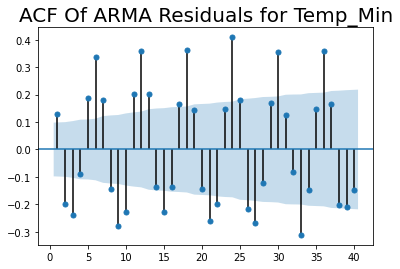

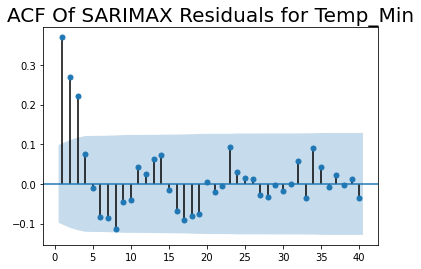

In [50]:
sgt.plot_acf(df_arma_resid['Temp_Min'], zero = False, lags = 40)
plt.title("ACF Of ARMA Residuals for Temp_Min",size=20)
plt.show()

sgt.plot_acf(df_sarimax_resid['Temp_Min'], zero = False, lags = 40)
plt.title("ACF Of SARIMAX Residuals for Temp_Min",size=20)
plt.show()

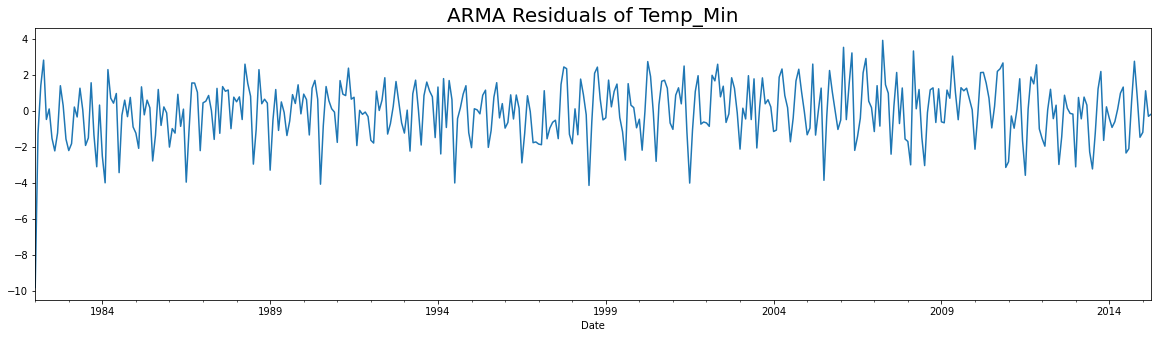

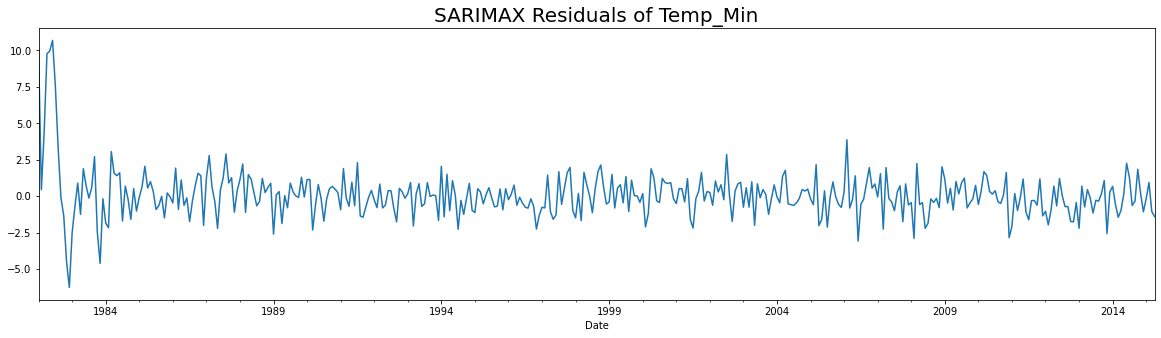

In [51]:
df_arma_resid['Temp_Min'].plot(figsize=(20,5))
plt.title("ARMA Residuals of Temp_Min",size=20)
plt.show()

df_sarimax_resid['Temp_Min'].plot(figsize=(20,5))
plt.title("SARIMAX Residuals of Temp_Min",size=20)
plt.show()

# Test

In [52]:
df_test.iloc[42]

Temp_Min    14.12
Name: 2018-11-01 00:00:00, dtype: float64

In [53]:
df_test.index

DatetimeIndex(['2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01',
               '2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01'],
     

In [54]:
df_test.loc[('2019-12-1')]['Temp_Min']

8.82

In [60]:
results_sarimax_4.predict(('2020-11-01'))

2020-11-01    13.754385
Freq: MS, dtype: float64

In [59]:
results_sarimax_4.predict(('2020-12-01'))

2020-12-01    9.418852
Freq: MS, dtype: float64

In [ ]:
actuals = [df_test.loc[i]['Temp_Min'] for i in df_test.index]
predictions = []
for i in df_test.index:
  predicted_temp_max = results_sarimax_4.predict(str(i.date())).get(0)
  predictions.append(predicted_temp_max)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(actuals, predictions)

In [ ]:
df_pred = pd.DataFrame(columns=['Actual', 'Predicted'])
df_pred['Actual'] = actuals
df_pred['Predicted'] = [item for item in results_sarimax_4.forecast(56)]
df_pred

In [ ]:
# import pickle
# with open("/content/drive/MyDrive/Capstone_ML_Guild/Capstone/Time_Series_Analysis_for_Weather/TimeSeries_Models/Temp_Min_Model.pkl", "wb") as file:
#   pickle.dump(results_sarimax_4, file)